In [31]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns


In [32]:
!pip install scikit-learn

In [34]:
df = pd.read_csv('..\profiling\df_final.csv', low_memory=False)

In [35]:
display(df)

,subject_id,hadm_id,itemid,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,admittime_x,...,age,labevent_id,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,flag,priority,horas_desde_admissao_labevent,label_labevent
0,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9201.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN
1,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9197.0,2157-12-19 10:25:00,NaN,NaN,mg/dL,NaN,ROUTINE,17.450000,NaN
2,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9203.0,2157-12-19 10:25:00,NaN,NaN,NaN,NaN,ROUTINE,17.450000,NaN
3,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9204.0,2157-12-19 10:25:00,7.0,7.000,units,NaN,ROUTINE,17.450000,NaN
4,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,55,9207.0,2157-12-19 10:25:00,1.011,1.011,,NaN,ROUTINE,17.450000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939811,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473850.0,2148-01-24 00:58:00,31.0,31.000,g/dL,abnormal,STAT,12.666667,NaN
11939812,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473849.0,2148-01-24 00:58:00,29.7,29.700,pg,NaN,STAT,12.666667,NaN
11939813,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473848.0,2148-01-24 00:58:00,6.6,6.600,g/dL,abnormal,STAT,12.666667,NaN
11939814,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,69,473855.0,2148-01-24 00:58:00,10.1,10.100,K/uL,abnormal,STAT,12.666667,NaN


In [36]:
print(df.columns)

Index(['subject_id', 'hadm_id', 'itemid', 'charttime_chartevent',
       'value_chartevent', 'valuenum_chartevent', 'valueuom_chartevent',
       'label_chartevent', 'category', 'admittime_x',
       'horas_desde_admissao_chartevent', 'icd_code', 'long_title',
       'admission_type', 'insurance', 'race', 'admission_location', 'age',
       'labevent_id', 'charttime_labevent', 'value_labevent',
       'valuenum_labevent', 'valueuom_labevent', 'flag', 'priority',
       'horas_desde_admissao_labevent', 'label_labevent'],
      dtype='object')


In [37]:
import os
base_path = r"../documents/mimic-iv-clinical-database-demo-2.2/hosp"

files_to_load = {
    "admissions": "admissions.csv.gz",
    "d_hcpcs": "d_hcpcs.csv.gz",
    "d_icd_diagnoses": "d_icd_diagnoses.csv.gz",
    "d_labitems": "d_labitems.csv.gz",
    "diagnoses_icd": "diagnoses_icd.csv.gz",
    "emar": "emar.csv.gz",
    "hcpcsevents": "hcpcsevents.csv.gz",
    "labevents": "labevents.csv.gz",
    "omr": "omr.csv.gz"
}

for name, relative_path in files_to_load.items():
    full_path = os.path.join(base_path, relative_path)
    if os.path.exists(full_path):
        print(f"\n🔹 Lendo {name} de: {full_path}")
        df = pd.read_csv(full_path, compression='gzip', low_memory=False)
        globals()[name] = df
        print(f"O dataset '{name}' tem {len(df)} linhas.")
        display(df.head())
    else:
        print(f"Ficheiro não encontrado: {full_path}")


🔹 Lendo admissions de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\admissions.csv.gz
O dataset 'admissions' tem 275 linhas.


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0



🔹 Lendo d_hcpcs de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\d_hcpcs.csv.gz
O dataset 'd_hcpcs' tem 89200 linhas.


,code,category,long_description,short_description
0,TD,NaN,Rn,Rn
1,A0428,NaN,"Ambulance service, basic life support, non-eme...",Bls
2,V5272,NaN,"Assistive listening device, tdd",Tdd
3,S2080,NaN,Laser-assisted uvulopalatoplasty (laup),Laup
4,S8037,NaN,Magnetic resonance cholangiopancreatography (m...,Mrcp



🔹 Lendo d_icd_diagnoses de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\d_icd_diagnoses.csv.gz
O dataset 'd_icd_diagnoses' tem 109775 linhas.


,icd_code,icd_version,long_title
0,0090,9,"Infectious colitis, enteritis, and gastroenter..."
1,01160,9,"Tuberculous pneumonia [any form], unspecified"
2,01186,9,"Other specified pulmonary tuberculosis, tuberc..."
3,01200,9,"Tuberculous pleurisy, unspecified"
4,01236,9,"Tuberculous laryngitis, tubercle bacilli not f..."



🔹 Lendo d_labitems de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\d_labitems.csv.gz
O dataset 'd_labitems' tem 1622 linhas.


,itemid,label,fluid,category
0,50808,Free Calcium,Blood,Blood Gas
1,50826,Tidal Volume,Blood,Blood Gas
2,50813,Lactate,Blood,Blood Gas
3,52029,% Ionized Calcium,Blood,Blood Gas
4,50801,Alveolar-arterial Gradient,Blood,Blood Gas



🔹 Lendo diagnoses_icd de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\diagnoses_icd.csv.gz
O dataset 'diagnoses_icd' tem 4506 linhas.


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10035185,22580999,3,4139,9
1,10035185,22580999,10,V707,9
2,10035185,22580999,1,41401,9
3,10035185,22580999,9,3899,9
4,10035185,22580999,11,V8532,9



🔹 Lendo emar de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\emar.csv.gz
O dataset 'emar' tem 35835 linhas.


,subject_id,hadm_id,emar_id,emar_seq,poe_id,pharmacy_id,enter_provider_id,charttime,medication,event_txt,scheduletime,storetime
0,10005909,20199380.0,10005909-74,74,10005909-97,96110427.0,NaN,2144-10-31 05:56:00,Magnesium Sulfate,NaN,2144-10-31 05:56:00,2144-10-31 05:56:00
1,10005909,20199380.0,10005909-79,79,10005909-97,96110427.0,NaN,2144-10-31 08:00:00,Magnesium Sulfate,NaN,2144-10-31 08:00:00,2144-10-31 08:15:00
2,10008287,22168393.0,10008287-32,32,10008287-58,NaN,P26PKF,2145-09-28 20:15:00,Potassium Chloride Replacement (Critical Care ...,NaN,2145-09-28 20:15:00,2145-09-28 20:38:00
3,10010471,21322534.0,10010471-33,33,10010471-51,52131847.0,NaN,2155-05-08 21:45:00,Metoprolol Tartrate,NaN,2155-05-08 21:45:00,2155-05-08 22:40:00
4,10015272,27993466.0,10015272-31,31,10015272-48,88758875.0,NaN,2137-06-13 08:36:00,Metoprolol Tartrate,NaN,2137-06-13 08:36:00,2137-06-13 08:36:00



🔹 Lendo hcpcsevents de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\hcpcsevents.csv.gz
O dataset 'hcpcsevents' tem 61 linhas.


,subject_id,hadm_id,chartdate,hcpcs_cd,seq_num,short_description
0,10005348,29176490,2129-05-22,93454,1,Cardiovascular
1,10005348,29176490,2129-05-22,92921,2,Cardiovascular
2,10004457,21039249,2140-09-17,92980,1,Cardiovascular
3,10004457,25559382,2148-09-14,93455,1,Cardiovascular
4,10039708,27504040,2142-07-06,64415,2,Nervous system



🔹 Lendo labevents de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\labevents.csv.gz
O dataset 'labevents' tem 107727 linhas.


,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,172061,10014354,29600294.0,1808066,51277,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,15.4,15.40,%,10.5,15.5,NaN,ROUTINE,NaN
1,172062,10014354,29600294.0,1808066,51279,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,3.35,3.35,m/uL,4.6,6.1,abnormal,ROUTINE,NaN
2,172068,10014354,29600294.0,1808066,52172,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,49.7,49.70,fL,35.1,46.3,abnormal,ROUTINE,NaN
3,172063,10014354,29600294.0,1808066,51301,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,20.3,20.30,K/uL,4.0,10.0,abnormal,ROUTINE,NaN
4,172050,10014354,29600294.0,1808066,51249,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,31.1,31.10,g/dL,32.0,37.0,abnormal,ROUTINE,NaN



🔹 Lendo omr de: ../documents/mimic-iv-clinical-database-demo-2.2/hosp\omr.csv.gz
O dataset 'omr' tem 2964 linhas.


,subject_id,chartdate,seq_num,result_name,result_value
0,10011398,2146-12-01,1,Height (Inches),63
1,10011398,2147-01-22,1,Weight (Lbs),127
2,10011398,2146-12-01,1,Weight (Lbs),135
3,10011398,2147-07-24,1,Weight (Lbs),136
4,10011398,2147-03-26,1,Weight (Lbs),136


# Add Variables


In [38]:
display(omr)

,subject_id,chartdate,seq_num,result_name,result_value
0,10011398,2146-12-01,1,Height (Inches),63
1,10011398,2147-01-22,1,Weight (Lbs),127
2,10011398,2146-12-01,1,Weight (Lbs),135
3,10011398,2147-07-24,1,Weight (Lbs),136
4,10011398,2147-03-26,1,Weight (Lbs),136
...,...,...,...,...,...
2959,10021118,2161-11-15,1,Height (Inches),71
2960,10021118,2161-11-15,1,BMI (kg/m2),35.2
2961,10021118,2161-11-29,1,Blood Pressure,111/72
2962,10021118,2161-12-25,1,Blood Pressure,135/76


In [39]:
display(hcpcsevents)

,subject_id,hadm_id,chartdate,hcpcs_cd,seq_num,short_description
0,10005348,29176490,2129-05-22,93454,1,Cardiovascular
1,10005348,29176490,2129-05-22,92921,2,Cardiovascular
2,10004457,21039249,2140-09-17,92980,1,Cardiovascular
3,10004457,25559382,2148-09-14,93455,1,Cardiovascular
4,10039708,27504040,2142-07-06,64415,2,Nervous system
...,...,...,...,...,...,...
56,10039708,27504040,2142-07-06,99219,3,Hospital observation services
57,10039708,22999601,2142-05-15,99219,1,Hospital observation services
58,10035631,29654498,2113-07-17,99218,3,Hospital observation services
59,10012853,20457729,2177-11-03,99219,2,Hospital observation services


In [9]:
df_wide = df.pivot_table(
    index=["subject_id", "chartdate"], 
    columns="result_name", 
    values="result_value",
    aggfunc="first"   # caso tenha mais de um valor para o mesmo dia
).reset_index()

In [10]:
display (df_wide)

result_name,subject_id,chartdate,BMI (kg/m2),Blood Pressure,Blood Pressure Lying,Blood Pressure Sitting,Blood Pressure Standing (1 min),Blood Pressure Standing (3 mins),Height (Inches),Weight (Lbs)
0,10000032,2180-04-27,NaN,110/65,NaN,NaN,NaN,NaN,NaN,94
1,10000032,2180-05-07,18.0,NaN,NaN,NaN,NaN,NaN,60,92.15
2,10000032,2180-05-25,18.6,106/60,NaN,NaN,NaN,NaN,NaN,95
3,10000032,2180-06-01,18.7,121/77,NaN,NaN,NaN,NaN,NaN,95.7
4,10000032,2180-06-22,18.9,100/60,NaN,NaN,NaN,NaN,60,97
...,...,...,...,...,...,...,...,...,...,...
951,10040025,2147-11-09,30.3,NaN,NaN,NaN,NaN,NaN,NaN,188.00
952,10040025,2147-12-05,32.3,NaN,NaN,NaN,NaN,NaN,NaN,200.00
953,10040025,2147-12-29,34.2,NaN,NaN,NaN,NaN,NaN,NaN,212
954,10040025,2147-12-30,30.3,NaN,NaN,NaN,NaN,NaN,NaN,187.61


<Axes: xlabel='result_name'>

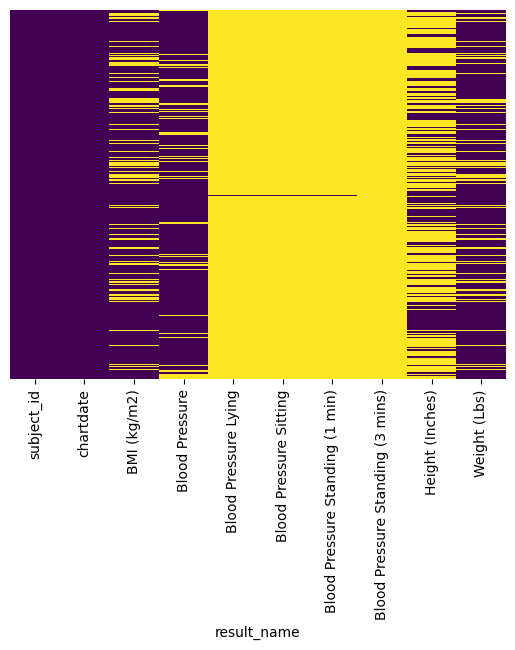

In [11]:
sns.heatmap(
    df_wide.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='viridis'
)

In [12]:
omr_new = df_wide.drop([
    'Blood Pressure Lying', 'Blood Pressure Sitting', 'Blood Pressure Standing (1 min)', 'Blood Pressure Standing (3 mins)'
], axis=1)

In [13]:
omr_new ['Height (Inches)'] = omr_new.groupby('subject_id')['Height (Inches)'].transform('first')

<Axes: xlabel='result_name'>

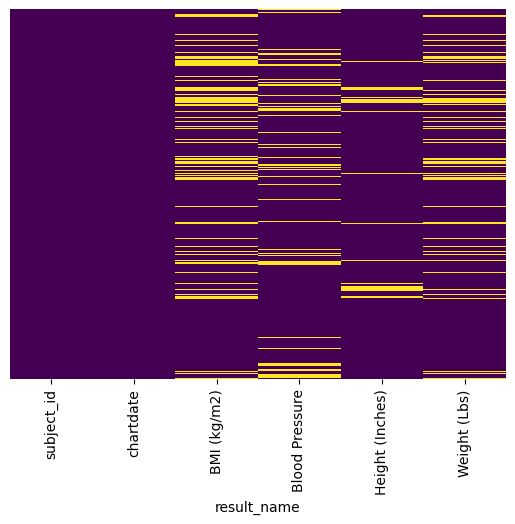

In [14]:
sns.heatmap(
    omr_new.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='viridis'
)

In [16]:
omr_new['charttime'] = pd.to_datetime(omr_new['chartdate'], errors='coerce')

In [ ]:
display(omr_new)

result_name,subject_id,chartdate,BMI (kg/m2),Blood Pressure,Height (Inches),Weight (Lbs),charttime
0,10000032,2180-04-27,NaN,110/65,60,94,2180-04-27
1,10000032,2180-05-07,18.0,NaN,60,92.15,2180-05-07
2,10000032,2180-05-25,18.6,106/60,60,95,2180-05-25
3,10000032,2180-06-01,18.7,121/77,60,95.7,2180-06-01
4,10000032,2180-06-22,18.9,100/60,60,97,2180-06-22
...,...,...,...,...,...,...,...
951,10040025,2147-11-09,30.3,NaN,66,188.00,2147-11-09
952,10040025,2147-12-05,32.3,NaN,66,200.00,2147-12-05
953,10040025,2147-12-29,34.2,NaN,66,212,2147-12-29
954,10040025,2147-12-30,30.3,NaN,66,187.61,2147-12-30


In [27]:
df['charttime_chartevent'] = pd.to_datetime(df['charttime_chartevent'], errors='coerce')
omr_new['charttime'] = pd.to_datetime(omr_new['charttime'], errors='coerce')

In [28]:
df = df.merge(
    omr_new,
    left_on=['subject_id', 'charttime_chartevent'],
    right_on=['subject_id', 'charttime'],
    how='left'
)


In [29]:
display(df)

,subject_id,hadm_id,itemid,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,admittime_x,...,flag,priority,horas_desde_admissao_labevent,label_labevent,chartdate,BMI (kg/m2),Blood Pressure,Height (Inches),Weight (Lbs),charttime
0,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,NaN,ROUTINE,17.450000,NaN,NaT,NaN,NaN,NaN,NaN,NaT
1,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,NaN,ROUTINE,17.450000,NaN,NaT,NaN,NaN,NaN,NaN,NaT
2,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,NaN,ROUTINE,17.450000,NaN,NaT,NaN,NaN,NaN,NaN,NaT
3,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,NaN,ROUTINE,17.450000,NaN,NaT,NaN,NaN,NaN,NaN,NaT
4,10001217,27703517,224650,2157-12-19 15:00:00,NaN,NaN,NaN,Ectopy Type 1,Routine Vital Signs,2157-12-18 16:58:00,...,NaN,ROUTINE,17.450000,NaN,NaT,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939811,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,abnormal,STAT,12.666667,NaN,NaT,NaN,NaN,NaN,NaN,NaT
11939812,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,NaN,STAT,12.666667,NaN,NaT,NaN,NaN,NaN,NaN,NaT
11939813,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,abnormal,STAT,12.666667,NaN,NaT,NaN,NaN,NaN,NaN,NaT
11939814,10040025,27996267,220001,2148-01-24 08:02:17,.Care Plan - Patient Safety Requiring the Use ...,NaN,NaN,Problem List,General,2148-01-23 12:18:00,...,abnormal,STAT,12.666667,NaN,NaT,NaN,NaN,NaN,NaN,NaT


In [30]:
sns.heatmap(
    df.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='viridis'
)

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x0000028B37DE9F80> (for post_execute), with arguments args (),kwargs {}:


MemoryError: Unable to allocate 11.7 GiB for an array with shape (11939816, 33, 4) and data type float64

MemoryError: Unable to allocate 11.7 GiB for an array with shape (11939816, 33, 4) and data type float64

<Figure size 640x480 with 1 Axes>

# 3% of the filtered dataset

In [12]:
df_sampled = df.groupby('icd_code', group_keys=False).sample(frac=0.03, random_state=42)

In [13]:
display(df_sampled)

,subject_id,hadm_id,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,...,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,admittime,time_since_admission_labevent,label_labevent
2485104,10036156,28019404,2157-07-02 04:00:00,92,92.0,%,O2 Saturation Pulseoxymetry Alarm - Low,Alarms,23.133333,2724,...,TRANSFER FROM HOSPITAL,88,2157-07-02 04:07:00,12,12.0,mEq/L,ROUTINE,2157-07-01 04:52:00,23.250000,NaN
3390471,10011398,27505812,2146-12-16 05:00:00,Sharp,NaN,NaN,Pain Type,Pain/Sedation,21.750000,2724,...,PHYSICIAN REFERRAL,67,2146-12-16 02:21:00,3.2,3.2,mg/dL,STAT,2146-12-15 07:15:00,19.100000,NaN
9245868,10018845,21101111,2184-10-08 04:38:00,Normal for Race,NaN,NaN,Skin Color,Skin - Assessment,2.166667,2724,...,EMERGENCY ROOM,91,2184-10-08 20:37:00,NaN,NaN,NaN,STAT,2184-10-08 02:28:00,18.150000,NaN
4836714,10018081,21027282,2133-12-19 12:26:00,Swab,NaN,NaN,Oral Care,Treatments,19.466667,2724,...,EMERGENCY ROOM,79,2133-12-18 17:28:00,5.1,5.1,mg/dL,ROUTINE,2133-12-18 16:58:00,0.500000,NaN
4516346,10018081,21027282,2133-12-19 06:00:00,2 rails up,NaN,NaN,Side Rails,Restraint/Support Systems,13.033333,2724,...,EMERGENCY ROOM,79,2133-12-18 17:28:00,13.9,13.9,%,ROUTINE,2133-12-18 16:58:00,0.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11787874,10019003,29279905,2153-03-28 19:00:00,97,97.0,%,O2 saturation pulseoxymetry,Respiratory,19.583333,Z87891,...,EMERGENCY ROOM,70,2153-03-28 14:04:00,30,30.0,mg/dL,ROUTINE,2153-03-27 23:25:00,14.650000,NaN
10134033,10023117,21607814,2175-07-07 00:00:00,Regular,NaN,NaN,Breathing pattern/effort,Pulmonary,8.050000,Z87891,...,EMERGENCY ROOM,58,2175-07-06 18:37:00,1.9,1.9,mg/dL,STAT,2175-07-06 15:57:00,2.666667,NaN
10957582,10023117,21133938,2175-03-21 16:00:00,Obeys Commands,6.0,NaN,GCS - Motor Response,Neurological,16.516667,Z87891,...,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,mg/dL,ROUTINE,2175-03-20 23:29:00,9.566667,NaN
11255657,10023117,21133938,2175-03-21 07:17:00,35,35.0,mmHg,Pulmonary Artery Pressure Alarm - High,Alarms,7.800000,Z87891,...,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,NaN,ROUTINE,2175-03-20 23:29:00,9.566667,NaN


In [14]:
df_sampled.isna().sum()

subject_id                              0
hadm_id                                 0
charttime_chartevent                    0
value_chartevent                    11330
valuenum_chartevent                199447
valueuom_chartevent                258100
label_chartevent                        0
category                                0
time_since_admission_chartevent         0
icd_code                                0
long_title                              0
admission_type                          0
insurance                               0
race                                    0
admission_location                      0
age                                     0
charttime_labevent                     24
value_labevent                      28937
valuenum_labevent                   46997
valueuom_labevent                   52690
priority                            86601
admittime                              24
time_since_admission_labevent          24
label_labevent                    

In [15]:
print("original distribution:")
print(df['icd_code'].value_counts(normalize=True).head())

print("\n now distribution:")
print(df_sampled['icd_code'].value_counts(normalize=True).head())

original distribution:
icd_code
4019      0.268460
2724      0.215680
E785      0.182704
E039      0.144255
Z87891    0.135853
Name: proportion, dtype: float64

 now distribution:
icd_code
4019      0.268460
2724      0.215679
E785      0.182705
E039      0.144254
Z87891    0.135853
Name: proportion, dtype: float64


In [16]:
df_sampled['valueuom_chartevent'] = df_sampled['valueuom_chartevent'].fillna('Unknown')

df_sampled = df_sampled.drop(columns=['label_labevent'])

In [17]:
display(df_sampled)

,subject_id,hadm_id,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,...,race,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,admittime,time_since_admission_labevent
2485104,10036156,28019404,2157-07-02 04:00:00,92,92.0,%,O2 Saturation Pulseoxymetry Alarm - Low,Alarms,23.133333,2724,...,UNKNOWN,TRANSFER FROM HOSPITAL,88,2157-07-02 04:07:00,12,12.0,mEq/L,ROUTINE,2157-07-01 04:52:00,23.250000
3390471,10011398,27505812,2146-12-16 05:00:00,Sharp,NaN,Unknown,Pain Type,Pain/Sedation,21.750000,2724,...,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,2146-12-16 02:21:00,3.2,3.2,mg/dL,STAT,2146-12-15 07:15:00,19.100000
9245868,10018845,21101111,2184-10-08 04:38:00,Normal for Race,NaN,Unknown,Skin Color,Skin - Assessment,2.166667,2724,...,WHITE,EMERGENCY ROOM,91,2184-10-08 20:37:00,NaN,NaN,NaN,STAT,2184-10-08 02:28:00,18.150000
4836714,10018081,21027282,2133-12-19 12:26:00,Swab,NaN,Unknown,Oral Care,Treatments,19.466667,2724,...,WHITE,EMERGENCY ROOM,79,2133-12-18 17:28:00,5.1,5.1,mg/dL,ROUTINE,2133-12-18 16:58:00,0.500000
4516346,10018081,21027282,2133-12-19 06:00:00,2 rails up,NaN,Unknown,Side Rails,Restraint/Support Systems,13.033333,2724,...,WHITE,EMERGENCY ROOM,79,2133-12-18 17:28:00,13.9,13.9,%,ROUTINE,2133-12-18 16:58:00,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11787874,10019003,29279905,2153-03-28 19:00:00,97,97.0,%,O2 saturation pulseoxymetry,Respiratory,19.583333,Z87891,...,WHITE,EMERGENCY ROOM,70,2153-03-28 14:04:00,30,30.0,mg/dL,ROUTINE,2153-03-27 23:25:00,14.650000
10134033,10023117,21607814,2175-07-07 00:00:00,Regular,NaN,Unknown,Breathing pattern/effort,Pulmonary,8.050000,Z87891,...,WHITE,EMERGENCY ROOM,58,2175-07-06 18:37:00,1.9,1.9,mg/dL,STAT,2175-07-06 15:57:00,2.666667
10957582,10023117,21133938,2175-03-21 16:00:00,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,16.516667,Z87891,...,WHITE,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,mg/dL,ROUTINE,2175-03-20 23:29:00,9.566667
11255657,10023117,21133938,2175-03-21 07:17:00,35,35.0,mmHg,Pulmonary Artery Pressure Alarm - High,Alarms,7.800000,Z87891,...,WHITE,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,NaN,ROUTINE,2175-03-20 23:29:00,9.566667


In [18]:
print(df_sampled.columns)

Index(['subject_id', 'hadm_id', 'charttime_chartevent', 'value_chartevent',
       'valuenum_chartevent', 'valueuom_chartevent', 'label_chartevent',
       'category', 'time_since_admission_chartevent', 'icd_code', 'long_title',
       'admission_type', 'insurance', 'race', 'admission_location', 'age',
       'charttime_labevent', 'value_labevent', 'valuenum_labevent',
       'valueuom_labevent', 'priority', 'admittime',
       'time_since_admission_labevent'],
      dtype='object')


In [19]:
list(df_sampled.columns)

['subject_id',
 'hadm_id',
 'charttime_chartevent',
 'value_chartevent',
 'valuenum_chartevent',
 'valueuom_chartevent',
 'label_chartevent',
 'category',
 'time_since_admission_chartevent',
 'icd_code',
 'long_title',
 'admission_type',
 'insurance',
 'race',
 'admission_location',
 'age',
 'charttime_labevent',
 'value_labevent',
 'valuenum_labevent',
 'valueuom_labevent',
 'priority',
 'admittime',
 'time_since_admission_labevent']

In [20]:
df_sampled = df_sampled.drop(columns=['long_title', 'hadm_id'])
categorical_cols = [
    'value_chartevent', 'label_chartevent', 'category', 
    'admission_location', 'insurance', 'admission_type', 
    'valueuom_labevent', 'priority'
]

df_sampled[categorical_cols] = df_sampled[categorical_cols].fillna('Unknown')

numerical_cols = ['valuenum_chartevent', 'value_labevent', 'valuenum_labevent']

for col in numerical_cols:
    df[col + '_missing'] = df[col].isna().astype(int)


In [21]:
display(df_sampled)

,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,...,race,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,admittime,time_since_admission_labevent
2485104,10036156,2157-07-02 04:00:00,92,92.0,%,O2 Saturation Pulseoxymetry Alarm - Low,Alarms,23.133333,2724,URGENT,...,UNKNOWN,TRANSFER FROM HOSPITAL,88,2157-07-02 04:07:00,12,12.0,mEq/L,ROUTINE,2157-07-01 04:52:00,23.250000
3390471,10011398,2146-12-16 05:00:00,Sharp,NaN,Unknown,Pain Type,Pain/Sedation,21.750000,2724,SURGICAL SAME DAY ADMISSION,...,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,2146-12-16 02:21:00,3.2,3.2,mg/dL,STAT,2146-12-15 07:15:00,19.100000
9245868,10018845,2184-10-08 04:38:00,Normal for Race,NaN,Unknown,Skin Color,Skin - Assessment,2.166667,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,91,2184-10-08 20:37:00,NaN,NaN,Unknown,STAT,2184-10-08 02:28:00,18.150000
4836714,10018081,2133-12-19 12:26:00,Swab,NaN,Unknown,Oral Care,Treatments,19.466667,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,79,2133-12-18 17:28:00,5.1,5.1,mg/dL,ROUTINE,2133-12-18 16:58:00,0.500000
4516346,10018081,2133-12-19 06:00:00,2 rails up,NaN,Unknown,Side Rails,Restraint/Support Systems,13.033333,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,79,2133-12-18 17:28:00,13.9,13.9,%,ROUTINE,2133-12-18 16:58:00,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11787874,10019003,2153-03-28 19:00:00,97,97.0,%,O2 saturation pulseoxymetry,Respiratory,19.583333,Z87891,EW EMER.,...,WHITE,EMERGENCY ROOM,70,2153-03-28 14:04:00,30,30.0,mg/dL,ROUTINE,2153-03-27 23:25:00,14.650000
10134033,10023117,2175-07-07 00:00:00,Regular,NaN,Unknown,Breathing pattern/effort,Pulmonary,8.050000,Z87891,OBSERVATION ADMIT,...,WHITE,EMERGENCY ROOM,58,2175-07-06 18:37:00,1.9,1.9,mg/dL,STAT,2175-07-06 15:57:00,2.666667
10957582,10023117,2175-03-21 16:00:00,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,16.516667,Z87891,OBSERVATION ADMIT,...,WHITE,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,mg/dL,ROUTINE,2175-03-20 23:29:00,9.566667
11255657,10023117,2175-03-21 07:17:00,35,35.0,mmHg,Pulmonary Artery Pressure Alarm - High,Alarms,7.800000,Z87891,OBSERVATION ADMIT,...,WHITE,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,Unknown,ROUTINE,2175-03-20 23:29:00,9.566667


In [22]:
numerical_cols = ['valuenum_chartevent', 'value_labevent', 'valuenum_labevent']

for col in numerical_cols:
    df[col + '_missing'] = df[col].isna().astype(int)

display(df_sampled)

,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,...,race,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,admittime,time_since_admission_labevent
2485104,10036156,2157-07-02 04:00:00,92,92.0,%,O2 Saturation Pulseoxymetry Alarm - Low,Alarms,23.133333,2724,URGENT,...,UNKNOWN,TRANSFER FROM HOSPITAL,88,2157-07-02 04:07:00,12,12.0,mEq/L,ROUTINE,2157-07-01 04:52:00,23.250000
3390471,10011398,2146-12-16 05:00:00,Sharp,NaN,Unknown,Pain Type,Pain/Sedation,21.750000,2724,SURGICAL SAME DAY ADMISSION,...,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,2146-12-16 02:21:00,3.2,3.2,mg/dL,STAT,2146-12-15 07:15:00,19.100000
9245868,10018845,2184-10-08 04:38:00,Normal for Race,NaN,Unknown,Skin Color,Skin - Assessment,2.166667,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,91,2184-10-08 20:37:00,NaN,NaN,Unknown,STAT,2184-10-08 02:28:00,18.150000
4836714,10018081,2133-12-19 12:26:00,Swab,NaN,Unknown,Oral Care,Treatments,19.466667,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,79,2133-12-18 17:28:00,5.1,5.1,mg/dL,ROUTINE,2133-12-18 16:58:00,0.500000
4516346,10018081,2133-12-19 06:00:00,2 rails up,NaN,Unknown,Side Rails,Restraint/Support Systems,13.033333,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,79,2133-12-18 17:28:00,13.9,13.9,%,ROUTINE,2133-12-18 16:58:00,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11787874,10019003,2153-03-28 19:00:00,97,97.0,%,O2 saturation pulseoxymetry,Respiratory,19.583333,Z87891,EW EMER.,...,WHITE,EMERGENCY ROOM,70,2153-03-28 14:04:00,30,30.0,mg/dL,ROUTINE,2153-03-27 23:25:00,14.650000
10134033,10023117,2175-07-07 00:00:00,Regular,NaN,Unknown,Breathing pattern/effort,Pulmonary,8.050000,Z87891,OBSERVATION ADMIT,...,WHITE,EMERGENCY ROOM,58,2175-07-06 18:37:00,1.9,1.9,mg/dL,STAT,2175-07-06 15:57:00,2.666667
10957582,10023117,2175-03-21 16:00:00,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,16.516667,Z87891,OBSERVATION ADMIT,...,WHITE,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,mg/dL,ROUTINE,2175-03-20 23:29:00,9.566667
11255657,10023117,2175-03-21 07:17:00,35,35.0,mmHg,Pulmonary Artery Pressure Alarm - High,Alarms,7.800000,Z87891,OBSERVATION ADMIT,...,WHITE,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,Unknown,ROUTINE,2175-03-20 23:29:00,9.566667


In [23]:
df_sampled.to_csv("df_inicial_3%.csv", index=False)